<a href="https://colab.research.google.com/github/GauravGurv/ML_Projects/blob/main/ML_Indian_Restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------**Important Module **--------------------

In [2]:
#-----Important Library--------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
# warnings.filterwarnings("ignore")

-----------Importing data from dataset-------------

In [4]:

# df = pd.read_csv('D:\Data Science\DS_Project\Indian Restaurants\restaurants.csv')
df = pd.read_csv('https://raw.githubusercontent.com/GauravGurv/Practice_Dataset/main/Ind_restaurants.csv')
print(df.head(5))


                             Name  \
0                           Local   
1                   The G.T. ROAD   
2                         Tamasha   
3               The Junkyard Cafe   
4  Chili's American Grill and Bar   

                                       Location        Locality   City  \
0  Scindia House,Connaught Place, Central Delhi   Central Delhi  Delhi   
1        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   
2                Connaught Place, Central Delhi   Central Delhi  Delhi   
3                Connaught Place, Central Delhi   Central Delhi  Delhi   
4        M-Block,Connaught Place, Central Delhi   Central Delhi  Delhi   

                                             Cuisine  Rating  Votes  Cost  
0           North Indian,  Finger Food,  Continental     4.1   2415  2000  
1                                       North Indian     4.3   2363  1500  
2  Finger Food,  North Indian,  Italian,  Contine...     4.2   5016  2000  
3  North Indian,  Mediterran

-------------showing total numbers of rows and columns value entered----------

In [5]:
print(df.shape)


(6593, 8)


----------**Show total headers in data set**-------------

In [6]:
print(df.columns)


Index(['Name', 'Location', 'Locality', 'City', 'Cuisine', 'Rating', 'Votes',
       'Cost'],
      dtype='object')


--------------------Details of functialinalty in dataset-------------------

In [7]:
print(df.describe())

            Rating        Votes         Cost
count  6593.000000  6593.000000  6593.000000
mean      4.088200   119.420143  1102.798271
std       0.670031   261.849704   716.935212
min       1.000000     1.000000   100.000000
25%       3.900000     6.000000   500.000000
50%       4.200000    31.000000   900.000000
75%       4.400000   115.000000  1500.000000
max       5.000000  5016.000000  8000.000000


print(df.columns)
print(df.describe())

------------------Found total no of restaurant in city---------------

In [8]:
print(df['City'].value_counts())

Bangalore     1019
Delhi          734
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      414
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Kochi            2
Name: City, dtype: int64


Checking null values and based on null values need to clean the dataset accordingly

In [9]:
print("Total Numbers of Restaurants in city given billow:")
print(df.isnull().sum())

Total Numbers of Restaurants in city given billow:
Name        0
Location    0
Locality    0
City        0
Cuisine     0
Rating      0
Votes       0
Cost        0
dtype: int64


#------------Distribution of Ratings using Pie Graph-------------------

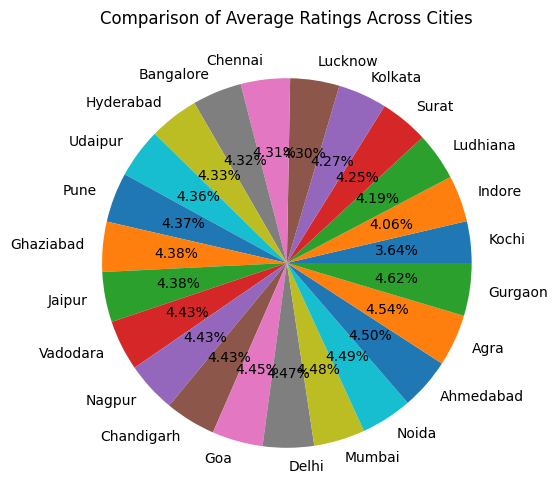

In [10]:
df_rating = df.groupby('City')['Rating'].mean().reset_index()
df_rating = df_rating.sort_values('Rating')
plt.figure(figsize=(8,6))
plt.pie(df_rating['Rating'], labels=df_rating['City'], autopct='%1.2f%%')
plt.title('Comparison of Average Ratings Across Cities')
plt.show()

# ----------------Categorizing Cities based on Count of Restaurants-----------------------

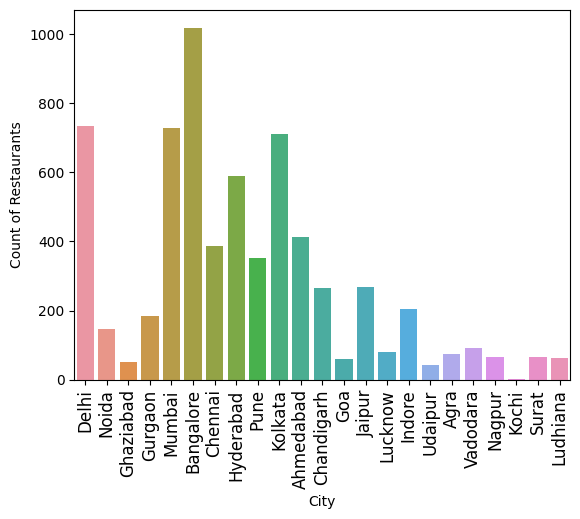

In [11]:
plt.xticks(rotation=90, fontsize=12)
sns.countplot(x= df['City'], data=df)
plt.ylabel('Count of Restaurants')
plt.show()


# ----------------Average Cost of Restaurants Across Cities vy figure-----------------------

In [12]:
average_cost = df.groupby(['City'])['Cost'].mean().reset_index()
fig = px.bar(average_cost, x='City', y='Cost', labels={'City': 'City', 'Name': 'Average Cost of Restaurants'},
             title='Average Cost in Each City', color = 'City')
fig.show()

# ----------------Average Voting Across Cities-----------------------

In [13]:
avg_vote = df.groupby(['City'])['Votes'].mean().reset_index()
fig = px.bar(avg_vote, x='City', y='Votes', labels={'City': 'City', 'Name': 'Average Number of Votes of Restaurants'},
             title='Average Votes in Each City', color = 'City')
fig.show()

# ----------------Categorizing Cities according to Number of Votes-----------------------

In [14]:
max_votes = df.groupby(['City'])['Votes'].sum().reset_index()
fig = px.bar(max_votes, x='City', y='Votes', labels={'City': 'City', 'Name': 'Number of Votes of Restaurants'},
             title='Top Votes in Each City', color = 'City')
fig.show()

# ----------------Top Cuisines in India-----------------------

In [15]:
df_cuisine = df.groupby(['City', 'Cuisine'])['Name'].count().reset_index()

# get the top cuisine for each city
df_top_cuisine = df_cuisine.loc[df_cuisine.groupby('City')['Name'].idxmax()]

# create the bar chart
fig = px.bar(df_top_cuisine, x='City', y='Name', color='Cuisine',labels={'City': 'City', 'Name': 'Number of Restaurants'},title='Top Cuisine in Each City')
fig.show()


# ----------------Restaraunt Distribution Across States-----------------------

In [16]:
# Forming dataframes in term of Locality and Cities
local_restaurants = df.groupby('Locality').sum()
city_restaurants = df.groupby('City').sum()

# List of City
rest_city = df['City'].value_counts()
print(rest_city)
fig = px.bar(x=rest_city.index, y = rest_city)
fig.update_layout(xaxis_title = 'City', yaxis_title = 'Total Restaurants',title_text = 'Restaraunt Distribution Across City',title_x = 0.5)
fig.show()

Bangalore     1019
Delhi          734
Mumbai         727
Kolkata        712
Hyderabad      589
Ahmedabad      414
Chennai        388
Pune           351
Jaipur         268
Chandigarh     264
Indore         204
Gurgaon        184
Noida          146
Vadodara        91
Lucknow         80
Agra            75
Nagpur          66
Surat           64
Ludhiana        62
Goa             60
Ghaziabad       50
Udaipur         43
Kochi            2
Name: City, dtype: int64


<ipython-input-16-d912e97d24ab>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-16-d912e97d24ab>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



# ----------------Figure to show City Values of Resturant-----------------------

In [17]:
restnt_city = df['City'].value_counts().sort_values(ascending = True)
fig = px.bar(y = restnt_city.index, x=restnt_city, color=restnt_city, orientation = 'h', labels = {'color': 'Total' +'<br>'+ 'Restaurants'}) # color continuous scale
fig.update_layout(yaxis_title = 'Cities', xaxis_title = 'Total Restaurants', title_text='Restaraunt Distribution Across Cities', title_x=0.5,
                  font=dict(family="Courier New, monospace", size=12, color='rgb(12, 128, 128)'))
fig.show()

# ----------------City-Wise Distribution-----------------------

In [21]:
fig = px.bar(df, x = 'City', y = 'Rating', color = 'City', labels={'City': 'City', 'Name': 'Number of Restaurants'})
fig.update_layout(xaxis_title = 'Cities', yaxis_title = 'Average Rating',title_text='Rating Distribution Across Cities')
fig.show()